In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.optimizers import SGD, Adam, RMSprop
from keras.activations import sigmoid, tanh, softmax
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pandas as pd
import seaborn as sns


In [ ]:
(X_train,y_train),(X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[5]

1

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes= ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:

def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

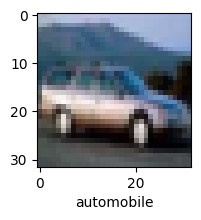

In [ ]:
plot_sample(X_train, y_train, 4)

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
def train_evaluate_mlp(X_train, y_train, X_test, y_test, optimizer_name, activation_fn, epochs, learning_rate):
  model = Sequential([
      Flatten(input_shape=(32,32,3)),
      Dense(128,activation = activation_fn),
      Dense(10,activation = 'softmax')
  ])
  if optimizer_name == 'sgd':
    optimizer = SGD(learning_rate)
  elif optimizer_name == 'adam':
    optimizer = Adam(learning_rate)
  elif optimizer_name == 'rmsprop':
    optimizer = RMSprop(learning_rate)
  else:
    raise ValueError("Wrong optimizer")
  model.compile(optimizer, loss='sparse_categorical_crossentropy',metrics = ['accuracy'])
  model.fit(X_train, y_train, epochs = epochs,batch_size=32, validation_split=0.2)
  #model.fit(X_train, y_train, epochs = epochs)
  model.evaluate(X_test, y_test)
  y_pred = model.predict(X_test)
  y_pred_class = [np.argmax(element)for element in y_pred]
  print("Clasification report: \n", classification_report(y_test,y_pred_class))
  acc = accuracy_score(y_test, y_pred_class)
  print("Accuracy Score: \n", acc)
  return acc

In [ ]:
learning_rates = [0.001, 0.1]
optimizers = ['sgd','adam']
activation_functions = ['relu','softmax','tanh','sigmoid']

In [ ]:
model_numbers = 1
results_dict = {}

for activation in activation_functions:
    for opti in optimizers:
        for lr in learning_rates:
            print(f"Running Model {model_numbers}: {opti}, {activation}, {lr}")
            accuracy = train_evaluate_mlp(X_train, y_train, X_test, y_test, opti, activation, 10, lr)

            results_dict[model_numbers] = {
                'activation': activation,
                'optimizer': opti,
                'learning_rate': lr,
                'accuracy': accuracy
            }

            model_numbers += 1

print("Results Dictionary:")
print(results_dict)

Running Model 1: sgd, relu, 0.001
Epoch 1/10
1250/1250 [==============================] - 7s 4ms/step - loss: 2.0789 - accuracy: 0.2574 - val_loss: 1.9816 - val_accuracy: 0.2988
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.9341 - accuracy: 0.3192 - val_loss: 1.9132 - val_accuracy: 0.3329
Epoch 3/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.8758 - accuracy: 0.3451 - val_loss: 1.8678 - val_accuracy: 0.3530
Epoch 4/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.8391 - accuracy: 0.3609 - val_loss: 1.8386 - val_accuracy: 0.3665
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8105 - accuracy: 0.3719 - val_loss: 1.8194 - val_accuracy: 0.3688
Epoch 6/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7878 - accuracy: 0.3844 - val_loss: 1.8081 - val_accuracy: 0.3758
Epoch 7/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7682 - accuracy: 0.3896 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Clasification report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.10      1.00      0.18      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000

Accuracy Score: 
 0.1
Running Model 5: sgd, softmax, 0.001
Epoch 1/10
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3019 - accuracy: 0.1054 - val_loss: 2.3017 - val_accuracy: 0.1086
Epoch 2/10
125

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/10
1250/1250 [==============================] - 6s 4ms/step - loss: 2.1588 - accuracy: 0.1634 - val_loss: 2.0933 - val_accuracy: 0.1797
Epoch 2/10
1250/1250 [==============================] - 4s 3ms/step - loss: 2.0796 - accuracy: 0.1863 - val_loss: 2.0756 - val_accuracy: 0.1850
Epoch 3/10
1250/1250 [==============================] - 4s 3ms/step - loss: 2.0522 - accuracy: 0.2042 - val_loss: 2.0622 - val_accuracy: 0.2135
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 2.0147 - accuracy: 0.2401 - val_loss: 2.0109 - val_accuracy: 0.2602
Epoch 5/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9678 - accuracy: 0.2738 - val_loss: 1.9669 - val_accuracy: 0.2793
Epoch 6/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9285 - accuracy: 0.2908 - val_loss: 1.9095 - val_accuracy: 0.3040
Epoch 7/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.9007 - accuracy: 0.3052 - val_loss: 1.8977 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Clasification report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.10      1.00      0.18      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000

Accuracy Score: 
 0.1
Running Model 9: sgd, tanh, 0.001
Epoch 1/10
1250/1250 [==============================] - 5s 4ms/step - loss: 2.0837 - accuracy: 0.2545 - val_loss: 1.9831 - val_accuracy: 0.3041
Epoch 2/10
1250/1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Clasification report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.10      1.00      0.18      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000

Accuracy Score: 
 0.1
Running Model 13: sgd, sigmoid, 0.001
Epoch 1/10
1250/1250 [==============================] - 6s 4ms/step - loss: 2.2545 - accuracy: 0.1763 - val_loss: 2.2031 - val_accuracy: 0.2368
Epoch 2/10
12

In [ ]:
print("Results Dictionary:")
print(results_dict)
dataframe = pd.DataFrame.from_dict(results_dict, orient='index')
print(dataframe)

Results Dictionary:
{1: {'activation': 'relu', 'optimizer': 'sgd', 'learning_rate': 0.001, 'accuracy': 0.3992}, 2: {'activation': 'relu', 'optimizer': 'sgd', 'learning_rate': 0.1, 'accuracy': 0.4051}, 3: {'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.001, 'accuracy': 0.4182}, 4: {'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.1, 'accuracy': 0.1}, 5: {'activation': 'softmax', 'optimizer': 'sgd', 'learning_rate': 0.001, 'accuracy': 0.1508}, 6: {'activation': 'softmax', 'optimizer': 'sgd', 'learning_rate': 0.1, 'accuracy': 0.3175}, 7: {'activation': 'softmax', 'optimizer': 'adam', 'learning_rate': 0.001, 'accuracy': 0.25}, 8: {'activation': 'softmax', 'optimizer': 'adam', 'learning_rate': 0.1, 'accuracy': 0.1}, 9: {'activation': 'tanh', 'optimizer': 'sgd', 'learning_rate': 0.001, 'accuracy': 0.3947}, 10: {'activation': 'tanh', 'optimizer': 'sgd', 'learning_rate': 0.1, 'accuracy': 0.3814}, 11: {'activation': 'tanh', 'optimizer': 'adam', 'learning_rate': 0.001

In [ ]:
########Now a Neural Network with dense layers
##for this version of the model, the following components will remain same for example.
##The learning rate will be fixed at 0.01 which I don't think is alot
###activation function and optimizers are gonnna stay the same
##I will create two models of neural networks one with two dense layers with low number of neurons and higher epochs
##the other model would be neural network with just one dense layer, highers neurons and higher epochs I am hoping it will have different impact


In [ ]:

def nn_with_dense_lower_neurons(X_train, y_train, X_test, y_test):
    '''This is 2 Dense Layers, Lower Neurons and Higher Epochs Configuration'''
    model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs = 25, batch_size=32, validation_split=0.2)
    model.evaluate(X_test, y_test)
    y_pred = model.predict(X_test)
    y_pred_class = [np.argmax(element) for element in y_pred]
    acc = accuracy_score(y_test, y_pred_class)
    classification_rep = classification_report(y_test, y_pred_class)
    confusion_mat = confusion_matrix(y_test, y_pred_class)

    # Display the results
    print("Classification Report: \n", classification_rep)
    print("Accuracy Score: \n", acc)
    print("Confusion Matrix: \n", confusion_mat)

    # Create a DataFrame for the results
    results_df = pd.DataFrame({
        'Model': ['nn_with_dense_lower_neurons'],
        'Accuracy': [acc],
        'Classification Report': [classification_rep],
        'Confusion Matrix': [confusion_mat.tolist()]
    })

    return results_df

In [ ]:
def nn_with_dense_higher_neurons(X_train, y_train, X_test, y_test):
    '''Only One Dense Layer, Higher Number of Total Neurons, and Lower Epochs Configuration'''
    model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(300, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs = 10, batch_size=32, validation_split=0.2)
    model.evaluate(X_test, y_test)
    y_pred = model.predict(X_test)
    y_pred_class = [np.argmax(element) for element in y_pred]
    acc = accuracy_score(y_test, y_pred_class)
    classification_rep = classification_report(y_test, y_pred_class)
    confusion_mat = confusion_matrix(y_test, y_pred_class)

    # Display the results
    print("Classification Report: \n", classification_rep)
    print("Accuracy Score: \n", acc)
    print("Confusion Matrix: \n", confusion_mat)

    # Create a DataFrame for the results
    results_df = pd.DataFrame({
        'Model': ['nn_with_dense_higher_neurons'],
        'Accuracy': [acc],
        'Classification Report': [classification_rep],
        'Confusion Matrix': [confusion_mat.tolist()]
    })

    return results_df


In [ ]:
results_df1 = nn_with_dense_lower_neurons(X_train, y_train, X_test, y_test)
results_df2 = nn_with_dense_higher_neurons(X_train, y_train, X_test, y_test)
final_results_df = pd.concat([results_df1, results_df2], ignore_index=True)

Epoch 1/25
1250/1250 [==============================] - 11s 7ms/step - loss: 1.9290 - accuracy: 0.3006 - val_loss: 1.8202 - val_accuracy: 0.3342
Epoch 2/25
1250/1250 [==============================] - 9s 7ms/step - loss: 1.7535 - accuracy: 0.3715 - val_loss: 1.7078 - val_accuracy: 0.3892
Epoch 3/25
1250/1250 [==============================] - 9s 7ms/step - loss: 1.6799 - accuracy: 0.3960 - val_loss: 1.7090 - val_accuracy: 0.3872
Epoch 4/25
1250/1250 [==============================] - 9s 7ms/step - loss: 1.6312 - accuracy: 0.4138 - val_loss: 1.6359 - val_accuracy: 0.4161
Epoch 5/25
1250/1250 [==============================] - 9s 7ms/step - loss: 1.5920 - accuracy: 0.4284 - val_loss: 1.6250 - val_accuracy: 0.4210
Epoch 6/25
1250/1250 [==============================] - 9s 7ms/step - loss: 1.5606 - accuracy: 0.4394 - val_loss: 1.5890 - val_accuracy: 0.4332
Epoch 7/25
1250/1250 [==============================] - 9s 7ms/step - loss: 1.5375 - accuracy: 0.4484 - val_loss: 1.5784 - val_accuracy

In [ ]:
# Display the final results DataFrame
print("Final Results Table:")
print(final_results_df)

Final Results Table:
                          Model  Accuracy  \
0   nn_with_dense_lower_neurons    0.4468   
1  nn_with_dense_higher_neurons    0.4543   

                               Classification Report  \
0                precision    recall  f1-score   ...   
1                precision    recall  f1-score   ...   

                                    Confusion Matrix  
0  [[388, 18, 43, 44, 65, 15, 79, 51, 180, 117], ...  
1  [[411, 58, 125, 29, 56, 27, 18, 27, 160, 89], ...  


In [ ]:
#####Now the convoolution network models to work on
###3. CNN
##a. Model 1: Conv layers and Dense layers as hidden layers
##b. Model 2: Conv layers, max pool layers and Dense layers as hidden layers
##c. Model 3: Conv layers, average pool layers and Dense layers as hidden layers
##d. Model 4: Conv, max pool, average pool and Dense layers as hidden layers

In [ ]:
def create_cnn_model(model_number):
  model = Sequential()
  if model_number == 1:
    #Conv layer and Dense Layers
    model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
    model.add(layers.Conv2D(64,(3,3),activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(128,activation='relu'))
    model.add(layers.Dense(10,activation='softmax'))
  elif model_number == 2:
    #Conv layer with max pool layers and Dense Layers
     model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
     model.add(layers.MaxPooling2D((2,2)))
     model.add(layers.Conv2D(64,(3,3),activation='relu'))
     model.add(layers.Flatten())
     model.add(layers.Dense(128,activation='relu'))
     model.add(layers.Dense(10,activation='softmax'))
  elif model_number == 3:
     model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
     model.add(layers.AveragePooling2D((2,2)))
     model.add(layers.Conv2D(64,(3,3),activation='relu'))
     model.add(layers.Flatten())
     model.add(layers.Dense(128,activation='relu'))
     model.add(layers.Dense(10,activation='softmax'))
  else:
     model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
     model.add(layers.MaxPooling2D((2, 2)))
     model.add(layers.AveragePooling2D((2,2)))
     model.add(layers.Conv2D(64,(3,3),activation='relu'))
     model.add(layers.Flatten())
     model.add(layers.Dense(128,activation='relu'))
     model.add(layers.Dense(10,activation='softmax'))
  return model



In [ ]:
def evaluate_model(model, x_data, y_true,X_train, y_train):
    model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs = 5, batch_size=32, validation_split=0.2)
    model.evaluate(x_data, y_true)
    y_pred = model.predict(x_data)
    y_pred_class = [np.argmax(element) for element in y_pred]
    acc = accuracy_score(y_test, y_pred_class)
    print(f"Accuracy: {acc * 100:.2f}%")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()


In [ ]:
#Chatgpt for plot and layer code
# Function to plot model architecture
def plot_model_architecture(model, model_name):
    tf.keras.utils.plot_model(model, to_file=f"{model_name}_architecture.png", show_shapes=True)

# Function to display layer information in a table
def display_layer_table(model, model_name):
    print(f"\nLayer Information for {model_name}:\n")
    print(f"{'Layer Name': <20} {'Output Shape': <30} {'Param #': <20}")
    print("="*70)
    total_params = 0
    for layer in model.layers:
        output_shape = layer.output_shape[1:]
        param_count = layer.count_params()
        total_params += param_count
        print(f"{layer.name: <20} {str(output_shape): <30} {param_count: <20}")
    print("="*70)
    print(f"Total Parameters for {model_name}: {total_params}\n")


In [ ]:
model1 = create_cnn_model(1)
plot_model_architecture(model1, "model1")
display_layer_table(model1, "Model 1")


Layer Information for Model 1:

Layer Name           Output Shape                   Param #             
conv2d_24            (30, 30, 32)                   896                 
conv2d_25            (28, 28, 64)                   18496               
flatten_11           (50176,)                       0                   
dense_22             (128,)                         6422656             
dense_23             (10,)                          1290                
Total Parameters for Model 1: 6443338



In [ ]:
evaluate_model(model1, X_test, y_test,X_train, y_train)

Epoch 1/5
1250/1250 [==============================] - 224s 179ms/step - loss: 1.4010 - accuracy: 0.5021 - val_loss: 1.2418 - val_accuracy: 0.5554
Epoch 2/5
1250/1250 [==============================] - 217s 174ms/step - loss: 0.9954 - accuracy: 0.6487 - val_loss: 1.0589 - val_accuracy: 0.6274
Epoch 3/5
1250/1250 [==============================] - 223s 178ms/step - loss: 0.7754 - accuracy: 0.7300 - val_loss: 1.0982 - val_accuracy: 0.6263
Epoch 4/5
1250/1250 [==============================] - 233s 187ms/step - loss: 0.5584 - accuracy: 0.8044 - val_loss: 1.1280 - val_accuracy: 0.6490
Epoch 5/5
313/313 [==============================] - 12s 38ms/step
Accuracy: 63.18%


ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [ ]:
model2 = create_cnn_model(2)
plot_model_architecture(model2, "model2")
display_layer_table(model2, "Model 2")


Layer Information for Model 2:

Layer Name           Output Shape                   Param #             
conv2d_4             (30, 30, 32)                   896                 
max_pooling2d        (15, 15, 32)                   0                   
conv2d_5             (13, 13, 64)                   18496               
flatten_2            (10816,)                       0                   
dense_3              (128,)                         1384576             
dense_4              (10,)                          1290                
Total Parameters for Model 2: 1405258



313/313 [==============================] - 5s 15ms/step
Accuracy: 9.68%


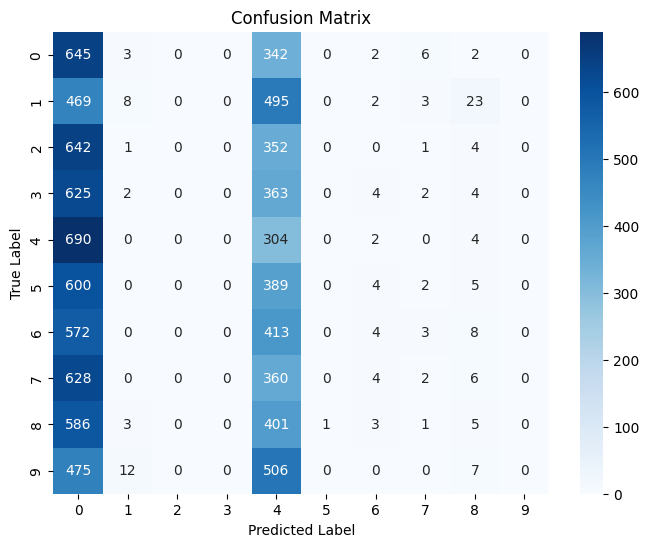

In [ ]:
evaluate_model(model2, X_test, y_test,X_train, y_train)

In [ ]:
model3 = create_cnn_model(3)
plot_model_architecture(model3, "model3")
display_layer_table(model3, "Model 3")


Layer Information for Model 3:

Layer Name           Output Shape                   Param #             
conv2d_6             (30, 30, 32)                   896                 
average_pooling2d    (15, 15, 32)                   0                   
conv2d_7             (13, 13, 64)                   18496               
flatten_3            (10816,)                       0                   
dense_5              (128,)                         1384576             
dense_6              (10,)                          1290                
Total Parameters for Model 3: 1405258



313/313 [==============================] - 5s 17ms/step
Accuracy: 9.43%


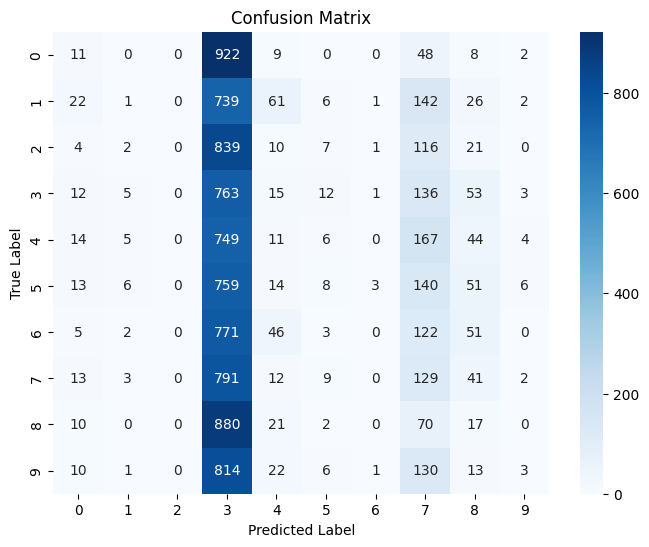

In [ ]:
evaluate_model(model3, X_test, y_test,X_train, y_train)

In [ ]:
model4 = create_cnn_model(4)
plot_model_architecture(model4, "model4")
display_layer_table(model4, "Model 4")



Layer Information for Model 4:

Layer Name           Output Shape                   Param #             
conv2d_8             (30, 30, 32)                   896                 
max_pooling2d_1      (15, 15, 32)                   0                   
average_pooling2d_1  (7, 7, 32)                     0                   
conv2d_9             (5, 5, 64)                     18496               
flatten_4            (1600,)                        0                   
dense_7              (128,)                         204928              
dense_8              (10,)                          1290                
Total Parameters for Model 4: 225610



313/313 [==============================] - 3s 8ms/step
Accuracy: 10.81%


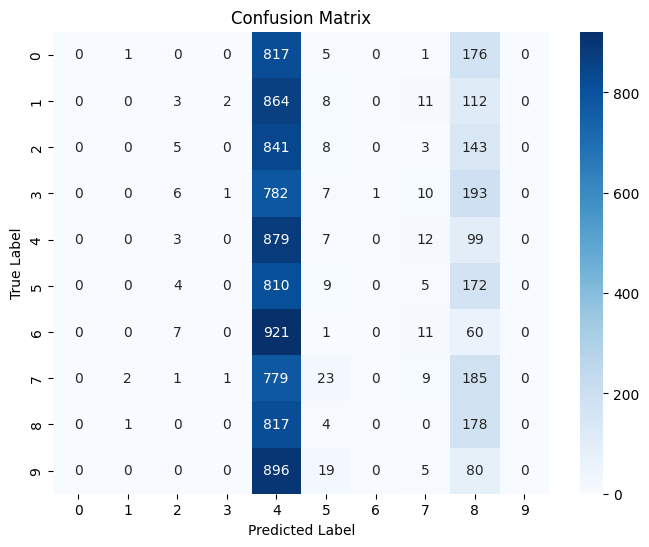

In [ ]:
evaluate_model(model4, X_test, y_test,X_train, y_train)

In [ ]:
###creating another CNN model code for variable sized parameters
def create_cnn_model_custom(model_number, padding, stride, kernel_size, x_data, y_true):
    model = Sequential()
    if model_number == 1:
        # Conv layer and Dense Layers
        model.add(Conv2D(32, kernel_size, activation='relu', input_shape=(32, 32, 3), padding=padding, strides=stride))
        model.add(Conv2D(64, kernel_size, activation='relu', padding=padding, strides=stride))
        model.add(Flatten())
        model.add(Dense(128, activation='relu'))
        model.add(Dense(10, activation='softmax'))
        model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        model.fit(X_train, y_train, epochs = 5, batch_size=32, validation_split=0.2)
        model.evaluate(x_data, y_true)
        y_pred = model.predict(x_data)
        y_pred_class = [np.argmax(element) for element in y_pred]
        acc = accuracy_score(y_test, y_pred_class)
        print(f"Accuracy: {acc * 100:.2f}%")
        return acc
    elif model_number == 2:
        # Conv layer with max pool layers and Dense Layers
        model.add(Conv2D(32, kernel_size, activation='relu', input_shape=(32, 32, 3), padding=padding, strides=stride))
        model.add(MaxPooling2D((2, 2)))
        model.add(Conv2D(64, kernel_size, activation='relu', padding=padding, strides=stride))
        model.add(Flatten())
        model.add(Dense(128, activation='relu'))
        model.add(Dense(10, activation='softmax'))
        model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        model.fit(X_train, y_train, epochs = 5, batch_size=32, validation_split=0.2)
        model.evaluate(x_data, y_true)
        y_pred = model.predict(x_data)
        y_pred_class = [np.argmax(element) for element in y_pred]
        acc = accuracy_score(y_test, y_pred_class)
        print(f"Accuracy: {acc * 100:.2f}%")
        return acc
    elif model_number == 3:
        model.add(Conv2D(32, kernel_size, activation='relu', input_shape=(32, 32, 3), padding=padding, strides=stride))
        model.add(AveragePooling2D((2, 2)))
        model.add(Conv2D(64, kernel_size, activation='relu', padding=padding, strides=stride))
        model.add(Flatten())
        model.add(Dense(128, activation='relu'))
        model.add(Dense(10, activation='softmax'))
        model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        model.fit(X_train, y_train, epochs = 5, batch_size=32, validation_split=0.2)
        model.evaluate(x_data, y_true)
        y_pred = model.predict(x_data)
        y_pred_class = [np.argmax(element) for element in y_pred]
        acc = accuracy_score(y_test, y_pred_class)
        print(f"Accuracy: {acc * 100:.2f}%")
        return acc
    else:
        model.add(Conv2D(32, kernel_size, activation='relu', input_shape=(32, 32, 3), padding=padding, strides=stride))
        model.add(MaxPooling2D((2, 2)))
        model.add(AveragePooling2D((2, 2)))
        model.add(Conv2D(64, kernel_size, activation='relu', padding=padding, strides=stride))
        model.add(Flatten())
        model.add(Dense(128, activation='relu'))
        model.add(Dense(10, activation='softmax'))
        model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        model.fit(X_train, y_train, epochs = 5, batch_size=32, validation_split=0.2)
        model.evaluate(x_data, y_true)
        y_pred = model.predict(x_data)
        y_pred_class = [np.argmax(element) for element in y_pred]
        acc = accuracy_score(y_test, y_pred_class)
        print(f"Accuracy: {acc * 100:.2f}%")
        return acc

In [ ]:
paddings = ['valid','same']
kernels = [(2,2),(3,3)]
strides = [(1,1),(2,2),(3,3)]

In [ ]:
##will do the tuning only for the model wuth the highest accuracy of all the models in vanilla cnn models

In [ ]:
model_numbers = 1
model_version = 1
results_dict = {}

for s in strides:
    for k in kernels:
        for padding in paddings:
            print(f"Running Model {model_version}: {s}, {k}, {padding}")
            accuracy = create_cnn_model_custom(model_version, padding, s, k, X_test, y_test)

            results_dict[model_numbers] = {
                'stride': s,
                'kernels': k,
                'padding': padding,
                'accuracy': accuracy
            }

            model_numbers += 1

print("Results Dictionary:")
print(results_dict)

Running Model 1: (1, 1), (2, 2), valid
Epoch 1/5
1250/1250 [==============================] - 10s 7ms/step - loss: 1.5142 - accuracy: 0.4677 - val_loss: 1.1865 - val_accuracy: 0.5862
Epoch 2/5
1250/1250 [==============================] - 8s 7ms/step - loss: 1.0447 - accuracy: 0.6342 - val_loss: 1.0698 - val_accuracy: 0.6315
Epoch 3/5
1250/1250 [==============================] - 10s 8ms/step - loss: 0.8109 - accuracy: 0.7182 - val_loss: 1.0513 - val_accuracy: 0.6451
Epoch 4/5
1250/1250 [==============================] - 8s 7ms/step - loss: 0.6142 - accuracy: 0.7879 - val_loss: 1.0876 - val_accuracy: 0.6488
Epoch 5/5
313/313 [==============================] - 1s 3ms/step
Accuracy: 63.98%
Running Model 1: (1, 1), (2, 2), same
Epoch 1/5
1250/1250 [==============================] - 11s 8ms/step - loss: 1.4623 - accuracy: 0.4799 - val_loss: 1.1702 - val_accuracy: 0.5980
Epoch 2/5
1250/1250 [==============================] - 9s 7ms/step - loss: 1.0273 - accuracy: 0.6396 - val_loss: 1.0570 - v

In [ ]:
print("Results Dictionary:")
print(results_dict)
dataframe = pd.DataFrame.from_dict(results_dict, orient='index')
print(dataframe)

Results Dictionary:
{1: {'stride': (1, 1), 'kernels': (2, 2), 'padding': 'valid', 'accuracy': 0.6398}, 2: {'stride': (1, 1), 'kernels': (2, 2), 'padding': 'same', 'accuracy': 0.6342}, 3: {'stride': (1, 1), 'kernels': (3, 3), 'padding': 'valid', 'accuracy': 0.6273}, 4: {'stride': (1, 1), 'kernels': (3, 3), 'padding': 'same', 'accuracy': 0.6307}, 5: {'stride': (2, 2), 'kernels': (2, 2), 'padding': 'valid', 'accuracy': 0.6193}, 6: {'stride': (2, 2), 'kernels': (2, 2), 'padding': 'same', 'accuracy': 0.6231}, 7: {'stride': (2, 2), 'kernels': (3, 3), 'padding': 'valid', 'accuracy': 0.6454}, 8: {'stride': (2, 2), 'kernels': (3, 3), 'padding': 'same', 'accuracy': 0.6436}, 9: {'stride': (3, 3), 'kernels': (2, 2), 'padding': 'valid', 'accuracy': 0.5629}, 10: {'stride': (3, 3), 'kernels': (2, 2), 'padding': 'same', 'accuracy': 0.5724}, 11: {'stride': (3, 3), 'kernels': (3, 3), 'padding': 'valid', 'accuracy': 0.5695}, 12: {'stride': (3, 3), 'kernels': (3, 3), 'padding': 'same', 'accuracy': 0.5914}

In [ ]:
model_numbers = 1
model_version = 4
results_dict = {}

for s in strides:
    for k in kernels:
        for padding in paddings:
            print(f"Running Model {model_version}: {s}, {k}, {padding}")
            accuracy = create_cnn_model_custom(model_version, padding, s, k, X_test, y_test)

            results_dict[model_numbers] = {
                'stride': s,
                'kernels': k,
                'padding': padding,
                'accuracy': accuracy
            }

            model_numbers += 1

print("Results Dictionary:")
print(results_dict)
print("Results Dictionary:")
print(results_dict)
dataframe = pd.DataFrame.from_dict(results_dict, orient='index')
print(dataframe)

Running Model 4: (1, 1), (2, 2), valid
Epoch 1/5
1250/1250 [==============================] - 32s 24ms/step - loss: 1.5170 - accuracy: 0.4534 - val_loss: 1.3978 - val_accuracy: 0.4920
Epoch 2/5
1250/1250 [==============================] - 30s 24ms/step - loss: 1.2048 - accuracy: 0.5725 - val_loss: 1.1842 - val_accuracy: 0.5873
Epoch 3/5
1250/1250 [==============================] - 30s 24ms/step - loss: 1.0761 - accuracy: 0.6230 - val_loss: 1.0512 - val_accuracy: 0.6319
Epoch 4/5
1250/1250 [==============================] - 30s 24ms/step - loss: 0.9844 - accuracy: 0.6537 - val_loss: 0.9943 - val_accuracy: 0.6543
Epoch 5/5
313/313 [==============================] - 2s 7ms/step
Accuracy: 66.01%
Running Model 4: (1, 1), (2, 2), same
Epoch 1/5
1250/1250 [==============================] - 38s 30ms/step - loss: 1.5302 - accuracy: 0.4498 - val_loss: 1.3118 - val_accuracy: 0.5287
Epoch 2/5
1250/1250 [==============================] - 37s 29ms/step - loss: 1.1926 - accuracy: 0.5754 - val_loss: 1

ValueError: Exception encountered when calling layer "conv2d_21" (type Conv2D).

Negative dimension size caused by subtracting 3 from 2 for '{{node conv2d_21/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 3, 3, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_21/Conv2D/ReadVariableOp)' with input shapes: [?,2,2,32], [3,3,32,64].

Call arguments received by layer "conv2d_21" (type Conv2D):
  • inputs=tf.Tensor(shape=(None, 2, 2, 32), dtype=float32)

In [ ]:
print("Results Dictionary:")
print(results_dict)
print("Results Dictionary:")
print(results_dict)
dataframe = pd.DataFrame.from_dict(results_dict, orient='index')
print(dataframe)

Results Dictionary:
{1: {'stride': (1, 1), 'kernels': (2, 2), 'padding': 'valid', 'accuracy': 0.6601}, 2: {'stride': (1, 1), 'kernels': (2, 2), 'padding': 'same', 'accuracy': 0.6628}, 3: {'stride': (1, 1), 'kernels': (3, 3), 'padding': 'valid', 'accuracy': 0.6657}, 4: {'stride': (1, 1), 'kernels': (3, 3), 'padding': 'same', 'accuracy': 0.6841}, 5: {'stride': (2, 2), 'kernels': (2, 2), 'padding': 'valid', 'accuracy': 0.5765}, 6: {'stride': (2, 2), 'kernels': (2, 2), 'padding': 'same', 'accuracy': 0.5766}, 7: {'stride': (2, 2), 'kernels': (3, 3), 'padding': 'valid', 'accuracy': 0.5415}, 8: {'stride': (2, 2), 'kernels': (3, 3), 'padding': 'same', 'accuracy': 0.5798}, 9: {'stride': (3, 3), 'kernels': (2, 2), 'padding': 'valid', 'accuracy': 0.4563}, 10: {'stride': (3, 3), 'kernels': (2, 2), 'padding': 'same', 'accuracy': 0.438}}
Results Dictionary:
{1: {'stride': (1, 1), 'kernels': (2, 2), 'padding': 'valid', 'accuracy': 0.6601}, 2: {'stride': (1, 1), 'kernels': (2, 2), 'padding': 'same', '